In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler,OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,balanced_accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
# from imblearn.over_sampling import SMOTE
# from xgboost import XGBClassifier
# from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from skopt import BayesSearchCV

In [51]:
data = pd.read_csv("modelers_data.csv")

# 1. Grzebanie w danych

In [3]:
data.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,949,msi,MSI Modern 15 B7M-072IN Laptop (Ryzen 5 7530U/...,43990,53,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
1,584,msi,MSI Prestige 16 A13UCX-250IN Laptop (13th Gen ...,119990,73,intel,core i7,14,20,16,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,2
2,937,acer,Acer Aspire 7 A715-75G Gaming Laptop (10th Gen...,45990,59,intel,core i5,4,8,8,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1
3,416,msi,MSI CreatorPro Z16 HX B13VKTO-214IN Laptop (13...,449990,89,intel,core i9,24,32,4,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,2
4,538,acer,Acer Aspire 3 Spin 14 NX.KENSI.002 Laptop (Int...,41490,45,intel,core i3,8,8,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1200,windows,1


In [11]:
data.Model[1]

'MSI Prestige 16 A13UCX-250IN Laptop (13th Gen Core i7/ 16GB/ 1TB SSD/ Win11/ 4GB Graphic)'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       693 non-null    int64  
 1   brand                       693 non-null    object 
 2   Model                       693 non-null    object 
 3   Price                       693 non-null    int64  
 4   Rating                      693 non-null    int64  
 5   processor_brand             693 non-null    object 
 6   processor_tier              693 non-null    object 
 7   num_cores                   693 non-null    int64  
 8   num_threads                 693 non-null    int64  
 9   ram_memory                  693 non-null    int64  
 10  primary_storage_type        693 non-null    object 
 11  primary_storage_capacity    693 non-null    int64  
 12  secondary_storage_type      693 non-null    object 
 13  secondary_storage_capacity  693 non

In [92]:
data.describe()

,index,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,display_size,resolution_width,resolution_height
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
mean,504.239538,77130.184704,64.191919,8.064935,12.178932,12.923521,608.369408,3.878788,15.201876,1994.409812,1172.072150
std,287.619742,57879.759959,9.778580,4.104854,5.417246,5.252160,266.134396,33.838912,0.927695,346.187751,250.576977
min,1.000000,12990.000000,31.000000,2.000000,0.000000,4.000000,32.000000,0.000000,10.100000,1080.000000,768.000000
25%,252.000000,43735.000000,58.000000,6.000000,8.000000,8.000000,512.000000,0.000000,14.000000,1920.000000,1080.000000
50%,505.000000,61990.000000,64.000000,8.000000,12.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1080.000000
75%,751.000000,88190.000000,71.000000,10.000000,16.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1200.000000
max,1002.000000,454490.000000,89.000000,24.000000,32.000000,36.000000,2048.000000,512.000000,18.000000,3456.000000,2234.000000


<!--                   unique_val | "NULL"                  | kodowanie
brand                          26 |                         | y ?
Model                         991 |                         | useless zmienna ?
Price                         545 |                         |   
Rating                         54 |                         |   
processor_brand                 4 | 'other'                 | oh
processor_tier                 15 | 'other'                 | numerycznie ?
num_cores                      12 |                         | 
num_threads                    15 |                         |
ram_memory                      7 |                         |       
primary_storage_type            2 |                         | oh
primary_storage_capacity        7 |                         |
secondary_storage_type          2 | 'No secondary storage'  | oh
secondary_storage_capacity      4 |                         |
gpu_brand                       5 |                         | oh
gpu_type                        3 |                         | oh ? [integrated,dedicated,apple]
is_touch_screen                 2 |                         |
display_size                   20 |                         |
resolution_width               20 |                         |
resolution_height              22 |                         |
OS                              7 | 'other'                 | oh
year_of_warranty                4 | 'No information'        | stwozyc kolumne no_inf lub dac wartosc 0
-->

- nie ma null-owych wartości (są poukrywane)
    
- zmienne kategoryczne
    - brand                       
    - Model                       
    - processor_brand             
    - processor_tier        
    - primary_storage_type        
    - secondary_storage_type   
    - gpu_brand                   
    - gpu_type                    
    - OS               


In [85]:
#   Column                      Non-Null Count  Dtype       Nulls                  Kodowanie
# ---  ------                      --------------  -----    -------                -------
#  1   brand                       693 non-null    object                           grupowanie,
#  2   Model                       693 non-null    object   useless                 odrzucic
#  3   Price                       693 non-null    int64   
#  4   Rating                      693 non-null    int64  
#  5   processor_brand             693 non-null    object   other                   oh
#  6   processor_tier              693 non-null    object   other                   numerycznie
#  7   num_cores                   693 non-null    int64  
#  8   num_threads                 693 non-null    int64  
#  9   ram_memory                  693 non-null    int64  
#  10  primary_storage_type        693 non-null    object                           oh,bin ?             676/17
#  11  primary_storage_capacity    693 non-null    int64  
#  12  secondary_storage_type      693 non-null    object   No secondary storage    oh,bin ? odrzucic    10/683
#  13  secondary_storage_capacity  693 non-null    int64  
#  14  gpu_brand                   693 non-null    object                           oh
#  15  gpu_type                    693 non-null    object                           apple ma apple, reszta binary
#  16  is_touch_screen             693 non-null    bool   
#  17  display_size                693 non-null    float64
#  18  resolution_width            693 non-null    int64  
#  19  resolution_height           693 non-null    int64  
#  20  OS                          693 non-null    object   other                   oh , stosunek windowsa do reszty 647/46
#  21  year_of_warranty            693 non-null    object   No information          numerycznie, kolumna na brak informacji

In [5]:
data.nunique()

index                         693
brand                          23
Model                         693
Price                         422
Rating                         51
processor_brand                 4
processor_tier                 14
num_cores                      12
num_threads                    15
ram_memory                      6
primary_storage_type            2
primary_storage_capacity        7
secondary_storage_type          2
secondary_storage_capacity      4
gpu_brand                       5
gpu_type                        3
is_touch_screen                 2
display_size                   18
resolution_width               16
resolution_height              18
OS                              5
year_of_warranty                4
dtype: int64

In [130]:
# wykres 2d wielkość punktu to zliczenia
data[['resolution_width','resolution_height']].value_counts()

resolution_width  resolution_height
1920              1080                 456
                  1200                  93
2560              1600                  44
1366              768                   37
2880              1800                  18
2560              1440                  10
3000              2000                   4
2880              1620                   4
1080              1920                   4
3024              1964                   3
3200              1800                   3
3456              2234                   3
1536              1024                   2
3200              2000                   2
2048              1536                   1
2256              1504                   1
1200              800                    1
2560              1660                   1
                  1664                   1
1440              2160                   1
1280              1024                   1
1200              1920                   1
3072              

In [6]:
# gpu appla ma gpu_type apple
data[['gpu_brand','gpu_type']].value_counts()

gpu_brand  gpu_type  
intel      integrated    314
nvidia     dedicated     247
amd        integrated    110
           dedicated      10
apple      apple           9
arm        integrated      2
intel      dedicated       1
Name: count, dtype: int64

In [68]:
data[['secondary_storage_type']].value_counts()

secondary_storage_type
No secondary storage      683
SSD                        10
Name: count, dtype: int64

In [69]:
data[['year_of_warranty']].value_counts()

year_of_warranty
1                   624
2                    50
No information       11
3                     8
Name: count, dtype: int64

# Analiza

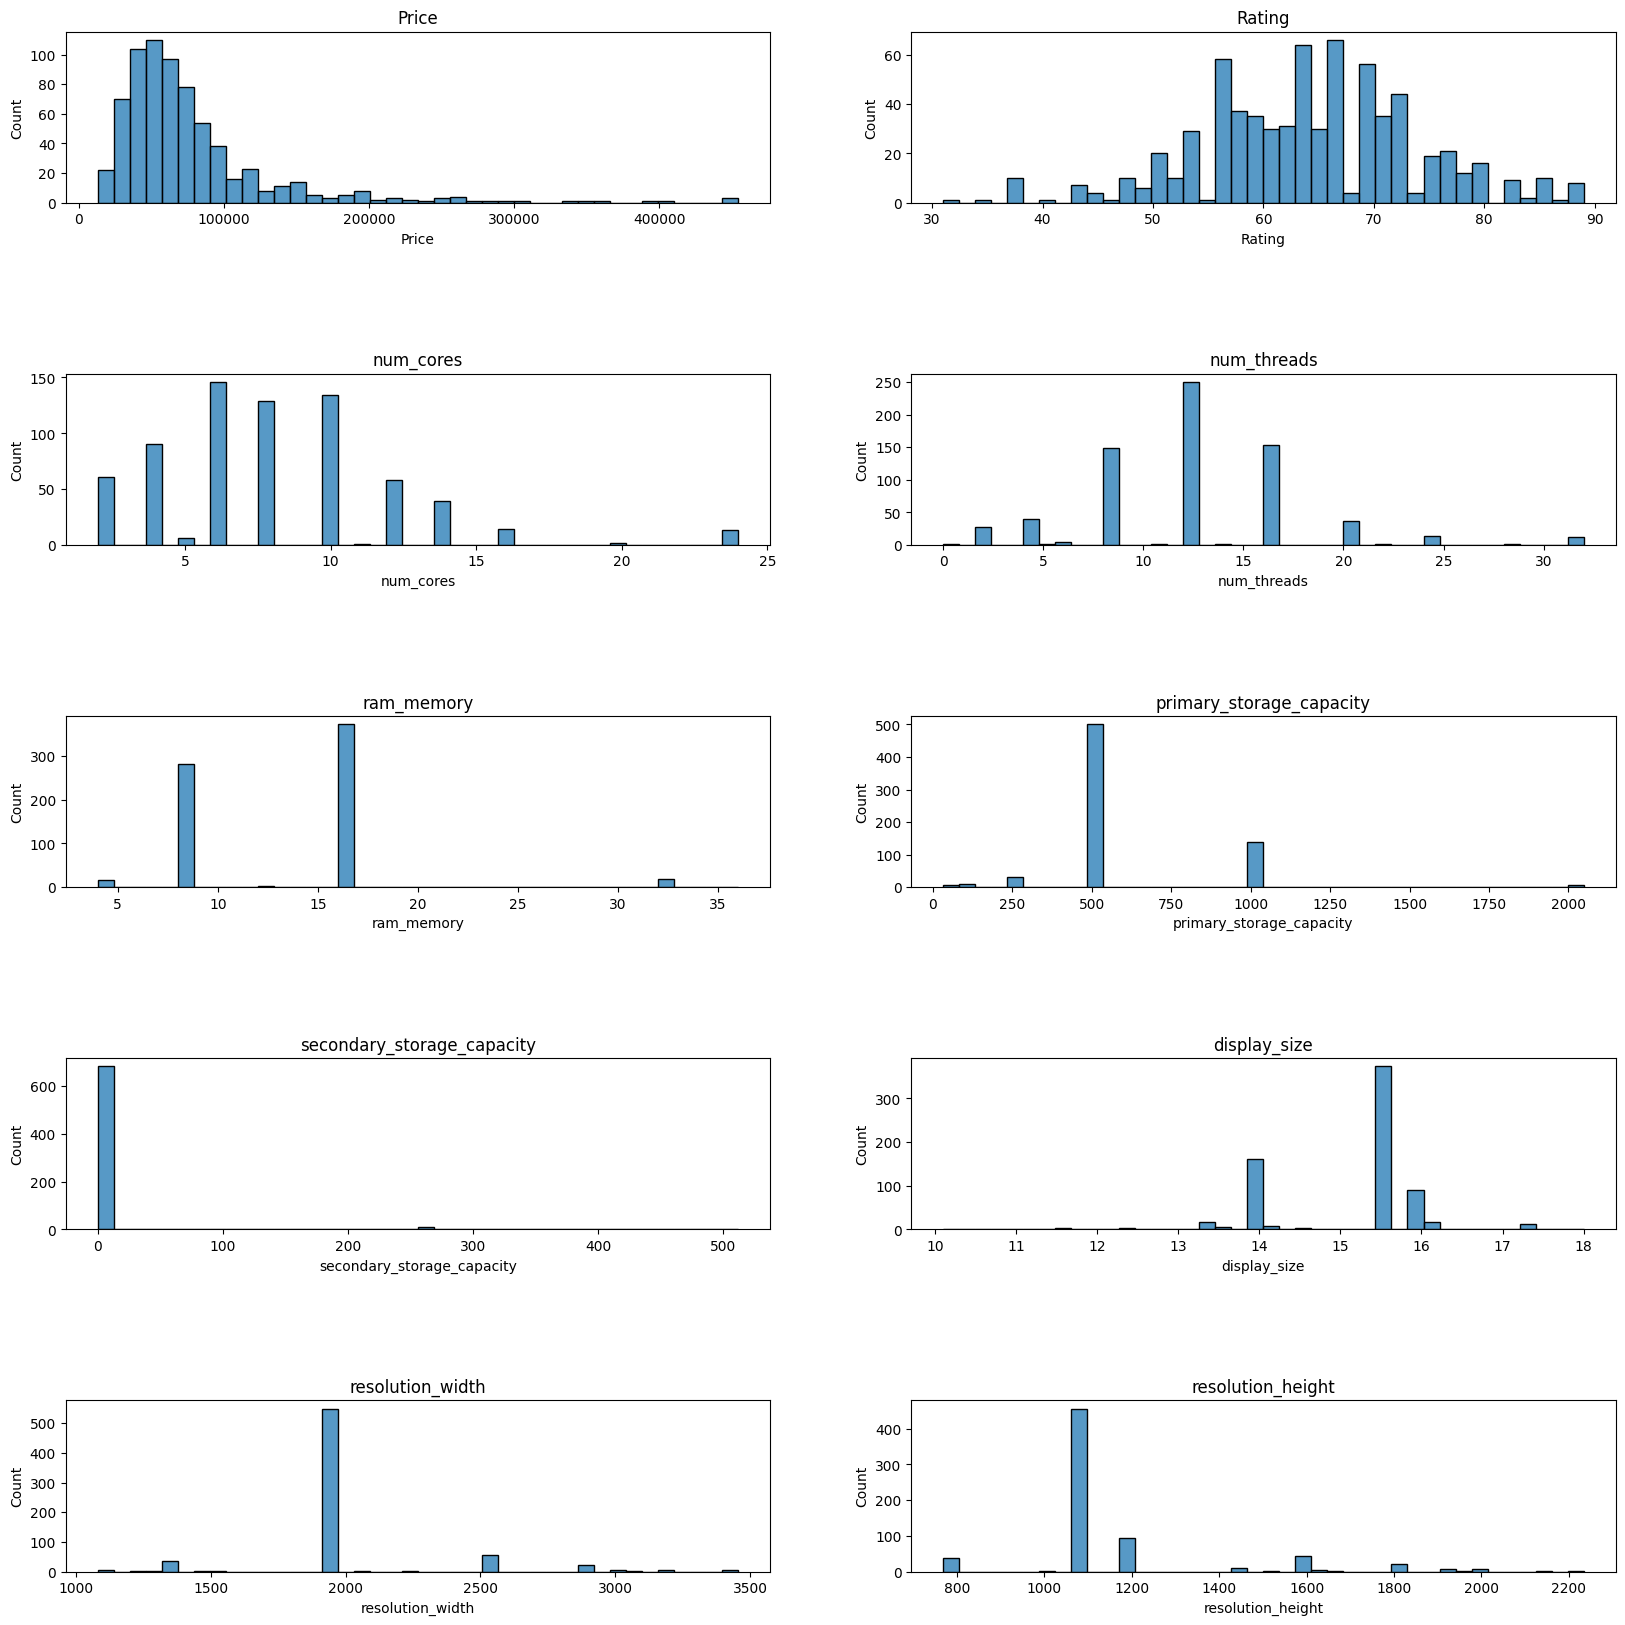

In [126]:
figure,ax = plt.subplots(5,2,figsize = (20,20))
figure.subplots_adjust(hspace = 1)
ax = ax.flatten()
i = 0
for col in ['Price','Rating','num_cores','num_threads','ram_memory','primary_storage_capacity','secondary_storage_capacity','display_size','resolution_width','resolution_height']:
    sns.histplot(data=data,x=col,ax=ax[i],bins=40)
    ax[i].set_title(col)
    i+=1



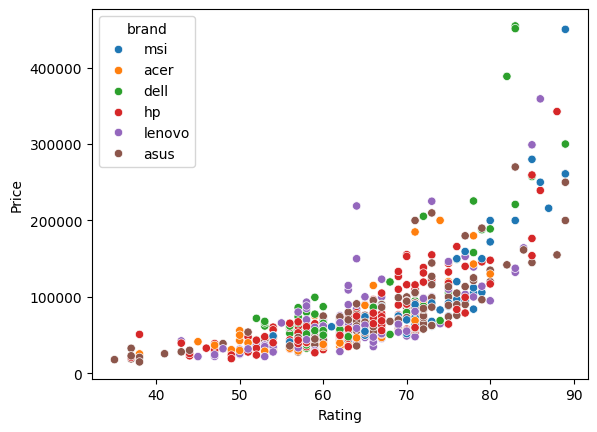

In [129]:
sns.scatterplot(data=data.loc[data.brand.isin(['hp','lenovo','asus','dell','msi','acer'])],x='Rating',y='Price',hue='brand')
plt.show()

C:\Users\jancw\AppData\Local\Temp\ipykernel_23384\1485351580.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


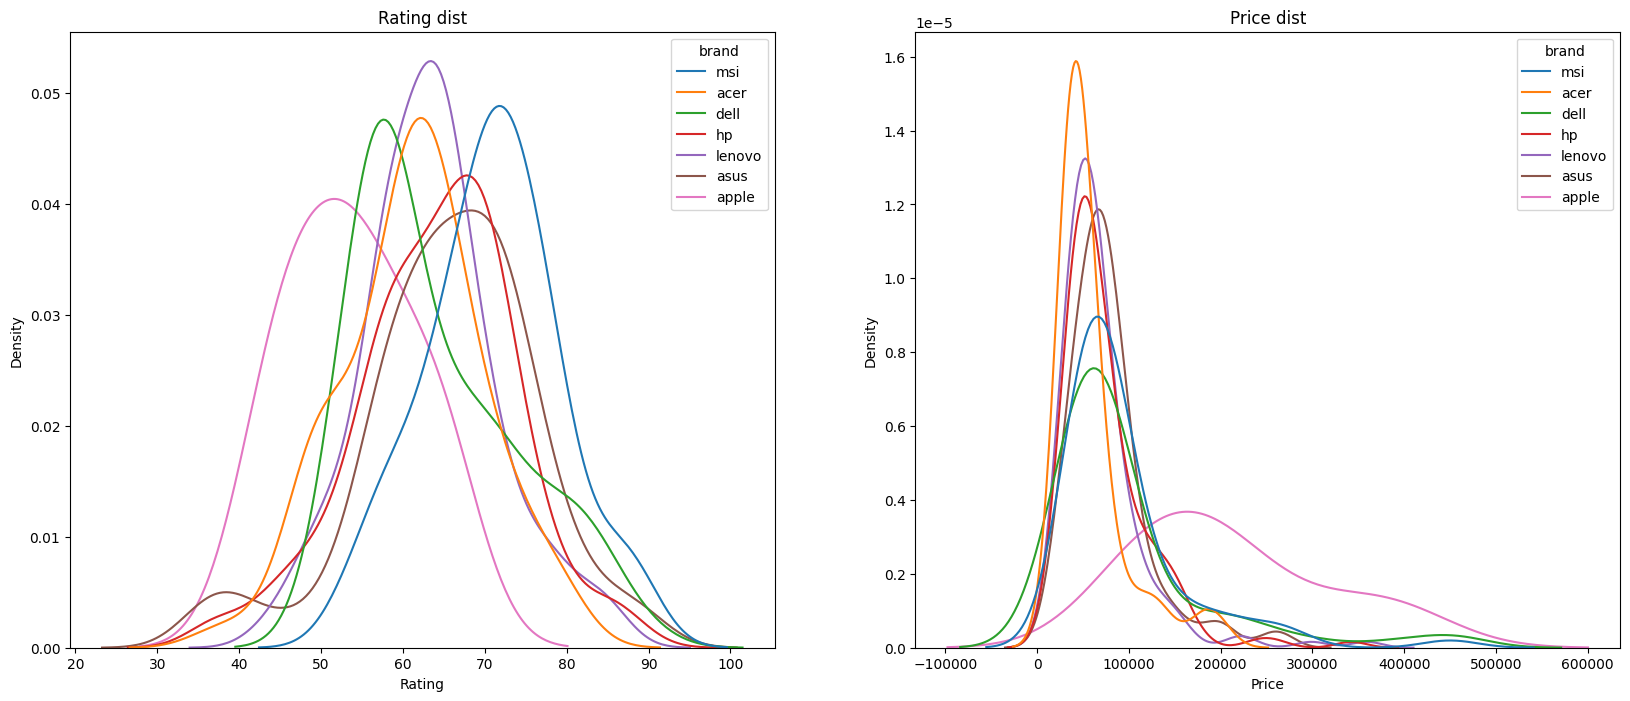

In [101]:
figure,ax = plt.subplots(1,2,figsize = (20,8))
ax = ax.flatten()
sns.kdeplot(data=data.loc[data.brand.isin(['hp','lenovo','asus','dell','msi','acer','apple'])],x='Rating',hue='brand',ax=ax[0],common_norm=False)
ax[0].set_title("Rating dist")
sns.kdeplot(data=data.loc[data.brand.isin(['hp','lenovo','asus','dell','msi','acer','apple'])],x='Price',hue='brand',ax=ax[1],common_norm=False)
ax[1].set_title("Price dist")
figure.show()

<Axes: xlabel='resolution_width', ylabel='resolution_height'>

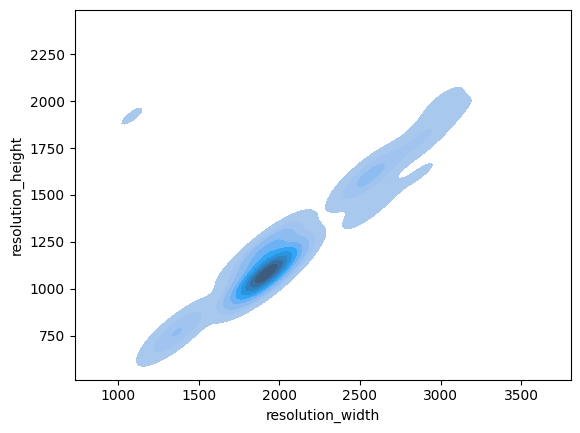

In [139]:
sns.kdeplot(data=data[['resolution_width','resolution_height']],x='resolution_width',y='resolution_height',fill=True)

In [136]:
data[['resolution_width','resolution_height']].value_counts().reset_index()

,resolution_width,resolution_height,count
0,1920,1080,456
1,1920,1200,93
2,2560,1600,44
3,1366,768,37
4,2880,1800,18
5,2560,1440,10
6,3000,2000,4
7,2880,1620,4
8,1080,1920,4
9,3024,1964,3


In [89]:
data.groupby("brand").index.count()

brand
acer          60
apple          9
asus         147
avita          2
chuwi          3
dell          69
fujitsu        2
gigabyte       2
honor          2
hp           150
infinix        8
lenovo       147
lg             5
microsoft      2
msi           67
primebook      1
realme         1
samsung        3
tecno          2
ultimus        3
walker         1
wings          3
zebronics      4
Name: index, dtype: int64

In [43]:
a = data.loc[data.gpu_type=='integrated'].iloc[1,2]
print(a)
s = a.find('(')
e = a.find(')')
lista = a[s+1:e].split('/')
lista_final = list(map(str.strip,lista))
print(lista_final)

Acer Aspire 3 Spin 14 NX.KENSI.002 Laptop (Intel Core i3 N305/ 8GB/ 512GB SSD/ Win11 Home)
['Intel Core i3 N305', '8GB', '512GB SSD', 'Win11 Home']


In [46]:
data.loc[data.gpu_type=='integrated'].iloc[1,:]

index                                                                       538
brand                                                                      acer
Model                         Acer Aspire 3 Spin 14 NX.KENSI.002 Laptop (Int...
Price                                                                     41490
Rating                                                                       45
processor_brand                                                           intel
processor_tier                                                          core i3
num_cores                                                                     8
num_threads                                                                   8
ram_memory                                                                    8
primary_storage_type                                                        SSD
primary_storage_capacity                                                    512
secondary_storage_type                  

In [40]:
data_copy = data.copy()

In [5]:
df_test = pd.DataFrame({'cpu_b':[],'cpu':[],'os':[],'gpu':[]})
for i in  range(data.shape[0]):
    a = data.iloc[i,2]
    s = a.find('(')
    e = a.find(')')
    lista = a[s+1:e].split('/')
    lista_final = list(map(str.strip,lista))
    df_test.loc[len(df_test)] = [data.iloc[i,14],lista_final[0],lista_final[3],lista_final[4] if (len(lista_final)==5) else "integrated"]



In [6]:
cpu_u = df_test.gpu.unique()
cpu_u.sort()
cpu_u
# różne nazewnictwo tych samych np. 'AMD Ryzen 5-5600H', 'AMD Ryzen 5 5600H'

array(['12GB Graph', '12GB Graphics', '16GB Graph', '2GB Graph',
       '2GB Graphic', '4 GB Graphics', '4GB Graph', '4GB Graphic',
       '4GB Graphics', '6 GB Graphics', '6GB Graph', '6GB Graphics',
       '8 GB Graphics', '8GB Graph', 'RTX 3000 Ada', 'RTX 4060 8GB Graph',
       'integrated'], dtype=object)

In [49]:
data.primary_storage_type.unique()

array(['SSD', 'HDD'], dtype=object)

In [48]:
data.loc[data.gpu_type=='apple'].gpu_brand.unique()

array(['apple'], dtype=object)

# Kodowanie kolumn

In [92]:
diff1 = pd.get_dummies(data_copy[['processor_brand']],dtype='int')
diff2 = pd.get_dummies(data_copy[['OS']],dtype='int')
diff3 = pd.get_dummies(data_copy[['primary_storage_type','secondary_storage_type','gpu_brand','gpu_type']],dtype='int')
brands_to_keep = ['hp' , 'lenovo' , 'asus','dell','msi','acer','apple']
data_copy['brand'] = data_copy['brand'].apply(lambda x: x if x in brands_to_keep else 'other')
diff4 = pd.get_dummies(data_copy[['brand']],dtype='int')
data_copy_2 = data_copy.copy()
data_copy_2 = data_copy_2.drop(['index','Model','brand','OS','primary_storage_type','processor_brand','secondary_storage_type','processor_tier','gpu_brand','gpu_type','year_of_warranty'],axis=1)
df1 = pd.concat([data_copy_2,diff1,diff2,diff3,diff4],axis=1)
df1.is_touch_screen = df1.is_touch_screen + 0


In [21]:
from sklearn.manifold import TSNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 693 samples in 0.000s...
[t-SNE] Computed neighbors for 693 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 693 / 693
[t-SNE] Mean sigma: 1401.094328
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.927052
[t-SNE] KL divergence after 4900 iterations: 0.152745


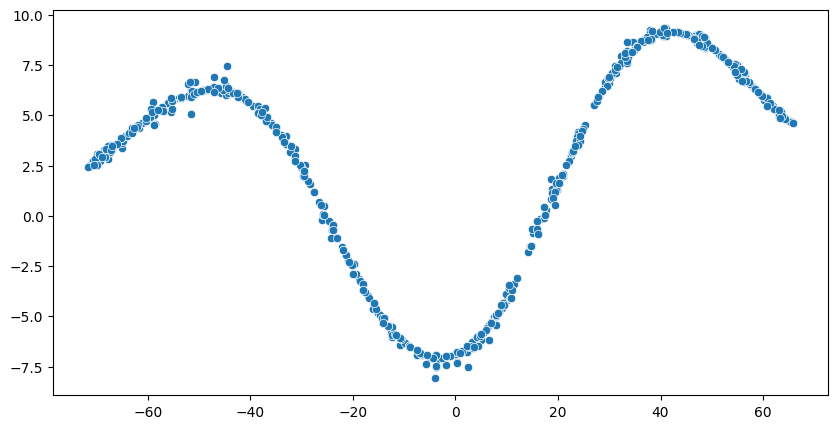

In [113]:
tSNE = TSNE(random_state=60, verbose=1,n_iter=10000)
digits_proj = tSNE.fit_transform(df1)
# for i in brands_to_keep:
#     df = digits_proj[data_copy.brand==i]
#     plt.figure(figsize=(10,5))
#     sns.scatterplot(x=df[:,0], y=df[:,1])
#     plt.show()
plt.figure(figsize=(10,5))
sns.scatterplot(x=digits_proj[:,0], y=digits_proj[:,1])
plt.show()